AI in Cybersecurity: Credit Card Fraud Detection Assignment

Analayse the code with the following algorithms
1.   Random Forest
2.   XGBOOST

Also experiment with SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/creditcard.csv')

In [ ]:

new_data = data.sample(n=50000, random_state=42)


## Random Forest Implementation

In [ ]:

X = new_data.drop(columns=['Class'])
y = new_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42)

cv = KFold(3, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


grid = GridSearchCV(rf,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv=cv,
                    n_jobs=-1,
                    verbose=1000)

# Fitting the grid search
grid.fit(X_train, y_train)

print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

# Taking the best estimator and fitting data
best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)

# Taking probabilities for model evaluation with different thresholds
y_pred_proba_test = best_rf.predict_proba(X_test)




Fitting 3 folds for each of 27 candidates, totalling 81 fits
BEST GRID SCORE 0.9826335961654982
BEST GRID PARAMS
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Function to evaluate the model
def model_evaluation(y_pred_proba_test):
    # Report for different thresholds
    thresholds = [i * 0.1 for i in range(0, 10)]
    print("----------------------------Results----------------------------")
    # Best ROC score initialization
    best_roc_score = 0

    # Iterating through every threshold from 0.1 to 0.9
    for threshold in thresholds:
        y_pred = np.where(y_pred_proba_test[:, 1] > threshold, 1, 0)
        # Calculating different metrics
        accuracy = str(round(metrics.accuracy_score(y_test, y_pred), 3))
        precision = str(round(metrics.precision_score(y_test, y_pred), 3))
        recall = str(round(metrics.recall_score(y_test, y_pred), 3))
        roc_auc = str(round(metrics.roc_auc_score(y_test, y_pred), 3))
        # Setting the best roc score, threshold, recall scores.
        if float(roc_auc) > best_roc_score:
            best_roc_score = float(roc_auc)
            best_threshold = threshold
            best_recall_score = recall
        # Printing the results for every threshold
        print("----------for Test with threshold", round(threshold, 2), "----------")
        print("accuracy\tprecision\trecall\t\troc_auc")
        print("\t\t".join([accuracy, precision, recall, roc_auc]))
        print("\n")
        # Confusion Matrix
        print("\t\tCONFUSION MATRIX")
        confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                                        columns=['Predicted Negative', 'Predicted Positive'],
                                        index=['Actual Negative', 'Actual Positive'])
        print(confusion_matrix)
        print("\n")
    print("BEST ROC AUC SCORE is ", best_roc_score, "at the threshold", best_threshold)
    return best_roc_score, best_threshold, best_recall_score

# Model evaluation
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)



----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0                9983
Actual Positive                   0                  17


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.619		0.765		0.882


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                9975                   8
Actual Positive                   4                  13


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.812		0.765		0.882


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                9980                   3
Actual Positive                   4                  13


----------for Test with threshold 

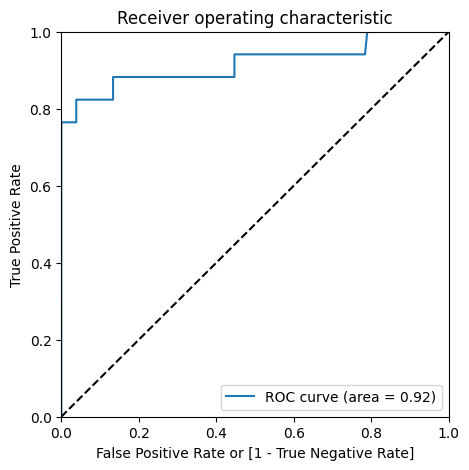

In [ ]:
# Function to draw the ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Drawing ROC curve
draw_roc(y_test, y_pred_proba_test[:, 1])

## XGBOOST Implementation

In [ ]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.3 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv('/content/creditcard.csv')

new_data = data.sample(n=15000, random_state=42)

X = new_data.drop(columns=['Class'])
y = new_data['Class']


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:35:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC Score: 0.995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2996
           1       1.00      0.75      0.86         4

    accuracy                           1.00      3000
   macro avg       1.00      0.88      0.93      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                2996                   0
Actual Positive                   1                   3


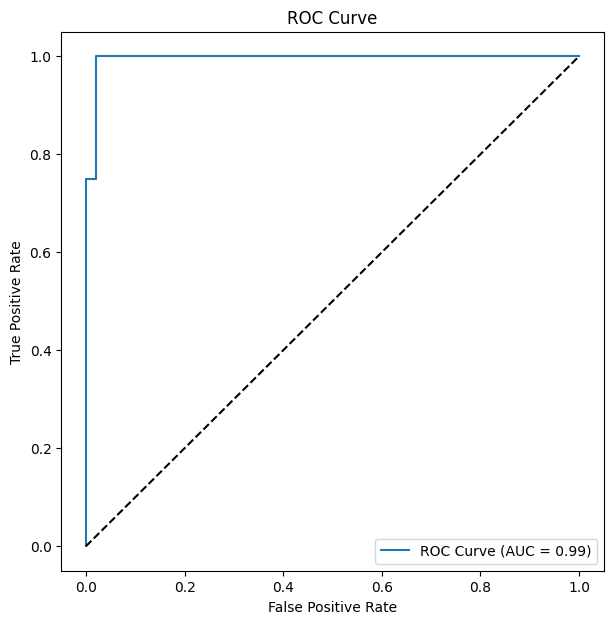

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load dataset


# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define XGBoost model with some basic parameters
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions and calculate probabilities
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred = xgb_model.predict(X_test)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'],
                   index=['Actual Negative', 'Actual Positive']))

# Plot ROC Curve
def plot_roc(actual, probs):
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(actual, probs)
    plt.figure(figsize=(7, 7))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc(y_test, y_pred_proba)


## SMOTE Implementation with Random Forest

In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.8 MB/s eta 0:00:00


Fitting 3 folds for each of 27 candidates, totalling 81 fits
BEST GRID SCORE 0.9999999582072027
BEST GRID PARAMS
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.915		0.015		1.0		0.957


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                2741                 255
Actual Positive                   0                   4


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.997		0.273		0.75		0.874


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                2988                   8
Actual Positive                   1                   3


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.5		0.75		0.874


		CONFUSION MATRIX
                 Predicted Ne

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


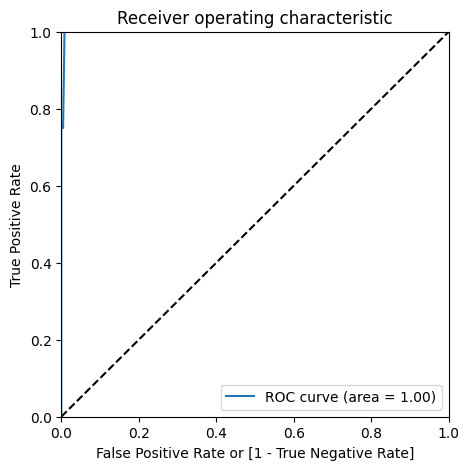

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

data = pd.read_csv('/content/creditcard.csv')
new_data = data.sample(n=15000, random_state=42)
X = new_data.drop(columns=['Class'])
y = new_data['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up folds for cross-validation
cv = KFold(3, shuffle=True, random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid = GridSearchCV(rf,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv=cv,
                    n_jobs=-1,
                    verbose=1000)

# Fit the grid search model using resampled data
grid.fit(X_train_resampled, y_train_resampled)

# Print the best score and parameters
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

# Take the best estimator from grid search and fit it
best_rf = grid.best_estimator_
best_rf.fit(X_train_resampled, y_train_resampled)

# Get probabilities for model evaluation with different thresholds
y_pred_proba_test = best_rf.predict_proba(X_test)

# Function to evaluate the model at different thresholds
def model_evaluation(y_pred_proba_test):
    # Report metrics at different thresholds
    thresholds = [i * 0.1 for i in range(0, 10)]
    print("----------------------------Results----------------------------")

    # Initialize best ROC AUC score
    best_roc_score = 0

    # Iterate through thresholds from 0.1 to 0.9
    for threshold in thresholds:
        y_pred = np.where(y_pred_proba_test[:, 1] > threshold, 1, 0)

        # Calculate performance metrics
        accuracy = str(round(metrics.accuracy_score(y_test, y_pred), 3))
        precision = str(round(metrics.precision_score(y_test, y_pred), 3))
        recall = str(round(metrics.recall_score(y_test, y_pred), 3))
        roc_auc = str(round(metrics.roc_auc_score(y_test, y_pred), 3))

        # Update best ROC AUC score if current score is higher
        if float(roc_auc) > best_roc_score:
            best_roc_score = float(roc_auc)
            best_threshold = threshold
            best_recall_score = recall

        # Print metrics for the current threshold
        print("----------for Test with threshold", round(threshold, 2), "----------")
        print("accuracy\tprecision\trecall\t\troc_auc")
        print("\t\t".join([accuracy, precision, recall, roc_auc]))
        print("\n")

        # Print confusion matrix
        print("\t\tCONFUSION MATRIX")
        confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                                        columns=['Predicted Negative', 'Predicted Positive'],
                                        index=['Actual Negative', 'Actual Positive'])
        print(confusion_matrix)
        print("\n")

    # Print the best ROC AUC score and corresponding threshold
    print("BEST ROC AUC SCORE is ", best_roc_score, "at the threshold", best_threshold)
    return best_roc_score, best_threshold, best_recall_score

# Evaluate the model
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)

# Function to draw the ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Draw the ROC curve
draw_roc(y_test, y_pred_proba_test[:, 1])


SMOTE With XG BOOST


In [ ]:
data = pd.read_csv('/content/creditcard.csv')

# Randomly sample 15,000 rows without replacement
new_data = data.sample(n=15000, random_state=42)

# Splitting dataset into features and target
X = new_data.drop(columns=['Class'])
y = new_data['Class']

In [ ]:
pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn import metrics
import pandas as pd

# Splitting dataset into features and target


# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Initial Random Forest model
rf = RandomForestClassifier(random_state=42)

# Folds for cross-validation
cv = KFold(3, shuffle=True, random_state=42)

# Setting parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search for running model with every possible combination
grid = GridSearchCV(rf,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv=cv,
                    n_jobs=-1,
                    verbose=1000)

# Fitting the grid search using SMOTE-balanced training data
grid.fit(X_smote, y_smote)

print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

# Taking the best estimator and fitting data
best_rf = grid.best_estimator_
best_rf.fit(X_smote, y_smote)

# Taking probabilities for model evaluation with different thresholds
y_pred_proba_test = best_rf.predict_proba(X_test)





Fitting 3 folds for each of 27 candidates, totalling 81 fits
BEST GRID SCORE 0.9999999582072027
BEST GRID PARAMS
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
def model_evaluation(y_pred_proba_test):
    # Report metrics at different thresholds
    thresholds = [i * 0.1 for i in range(0, 10)]
    print("----------------------------Results----------------------------")

    # Initialize best ROC AUC score
    best_roc_score = 0

    # Iterate through thresholds from 0.1 to 0.9
    for threshold in thresholds:
        y_pred = np.where(y_pred_proba_test[:, 1] > threshold, 1, 0)

        # Calculate performance metrics
        accuracy = str(round(metrics.accuracy_score(y_test, y_pred), 3))
        precision = str(round(metrics.precision_score(y_test, y_pred), 3))
        recall = str(round(metrics.recall_score(y_test, y_pred), 3))
        roc_auc = str(round(metrics.roc_auc_score(y_test, y_pred), 3))

        # Update best ROC AUC score if current score is higher
        if float(roc_auc) > best_roc_score:
            best_roc_score = float(roc_auc)
            best_threshold = threshold
            best_recall_score = recall

        # Print metrics for the current threshold
        print("----------for Test with threshold", round(threshold, 2), "----------")
        print("accuracy\tprecision\trecall\t\troc_auc")
        print("\t\t".join([accuracy, precision, recall, roc_auc]))
        print("\n")

        # Print confusion matrix
        print("\t\tCONFUSION MATRIX")
        confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                                        columns=['Predicted Negative', 'Predicted Positive'],
                                        index=['Actual Negative', 'Actual Positive'])
        print(confusion_matrix)
        print("\n")

    # Print the best ROC AUC score and corresponding threshold
    print("BEST ROC AUC SCORE is ", best_roc_score, "at the threshold", best_threshold)
    return best_roc_score, best_threshold, best_recall_score

In [ ]:
# Initialize the results DataFrame if it doesn't exist
try:
    results
except NameError:
    # Define `results` DataFrame structure
    results = pd.DataFrame(columns=['model_name', 'threshold', 'recall', 'roc_auc_score'])

# Model Evaluation
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)

# Storing the results
data = pd.DataFrame([['RANDOM FOREST WITH SMOTE', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results, data], ignore_index=True)

# Display the results
print(results)


----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.915		0.015		1.0		0.957


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                2741                 255
Actual Positive                   0                   4


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.997		0.273		0.75		0.874


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                2988                   8
Actual Positive                   1                   3


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.5		0.75		0.874


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                2993                   3
Actual Positive                   1                   3


----------for Test with threshold 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-13-bee49365975a>:14: FutureWarning: The behavior of DataFr

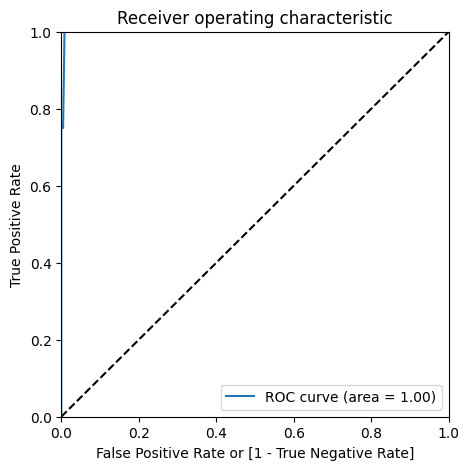

In [ ]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Draw the ROC curve
draw_roc(y_test, y_pred_proba_test[:, 1])

Observations:

XGBoost:

Without SMOTE, XGBoost achieved the highest ROC AUC score of 0.995, indicating exceptional performance in distinguishing between the positive and negative classes.
With SMOTE, the performance slightly decreased to 0.957. This could indicate that SMOTE might not be necessary or even slightly detrimental for XGBoost in this particular case.
Random Forest:

Without SMOTE, the Random Forest achieved a good ROC AUC score of 0.882.
With SMOTE, the performance significantly improved to 0.957, demonstrating that addressing class imbalance through SMOTE was beneficial for the Random Forest model.
Threshold:

Both Random Forest with SMOTE and XGBoost with SMOTE achieved their best ROC AUC scores at a threshold of 0.0. This suggests that a very low threshold might be necessary to maximize true positive rates, potentially leading to a higher number of false positives.
Analysis:

Impact of SMOTE:

SMOTE had a substantial positive impact on the Random Forest's performance, suggesting that the original dataset likely suffered from class imbalance.
For XGBoost, SMOTE did not significantly improve performance and might even have slightly hindered it. This could be due to XGBoost's inherent ability to handle class imbalance or the specific characteristics of the dataset.
Model Comparison:

While XGBoost without SMOTE exhibited the highest overall performance, Random Forest with SMOTE demonstrated a significant improvement and achieved a competitive score of 0.957.